In [17]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
watch_data=pd.read_csv("watches_cleaned.csv")

In [3]:
watch_data.shape

(2840, 7)

In [4]:
watch_data.head()

,Name,Price(₹),Brand,Ratings,Reviews,Type,Gender
0,Analog Watch - For Boys New Attractive Design...,209,Shivark,2.0,71,Analog,Boys
1,Trending Day & Date Functioning for Boys Analo...,279,LOIS CARON,4.5,93,Analog,Boys
2,T800 Digital Watch - For Boys & Girls 1221,386,RLS,2.6,235,Digital,Universal
3,Seraphina Analog Watch - For Women FCN089UL,1359,French Connection,1.3,394,Analog,Women
4,Stylish Analog Watch - For Women 81727784,900,Dressberry,4.4,169,Analog,Women


In [5]:
features = ["Price(₹)", "Ratings", "Reviews", "Brand"]


In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Price(₹)", "Ratings", "Reviews"]),
        ("cat", OneHotEncoder(drop="first"), ["Brand"])
    ]
)

In [7]:
X = preprocessor.fit_transform(watch_data[features])

In [8]:
#kmeans

In [9]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

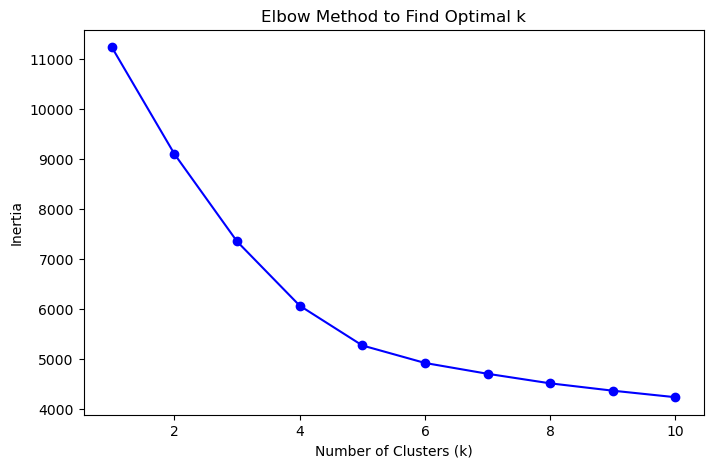

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal k")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
watch_data["Cluster"] = kmeans.fit_predict(X)

In [12]:
watch_data.head()

,Name,Price(₹),Brand,Ratings,Reviews,Type,Gender,Cluster
0,Analog Watch - For Boys New Attractive Design...,209,Shivark,2.0,71,Analog,Boys,0
1,Trending Day & Date Functioning for Boys Analo...,279,LOIS CARON,4.5,93,Analog,Boys,1
2,T800 Digital Watch - For Boys & Girls 1221,386,RLS,2.6,235,Digital,Universal,0
3,Seraphina Analog Watch - For Women FCN089UL,1359,French Connection,1.3,394,Analog,Women,0
4,Stylish Analog Watch - For Women 81727784,900,Dressberry,4.4,169,Analog,Women,1


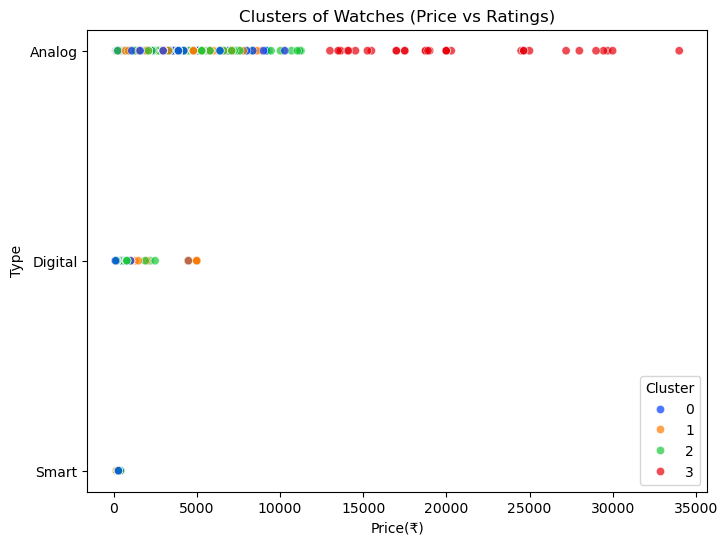

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = watch_data[watch_data["Type"] != "Unknown"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=filtered_data, 
    x="Price(₹)", 
    y="Type", 
    hue="Cluster", 
    palette="bright", 
    alpha=0.7
)
plt.title("Clusters of Watches (Price vs Ratings)")
plt.legend(title="Cluster")
plt.show()


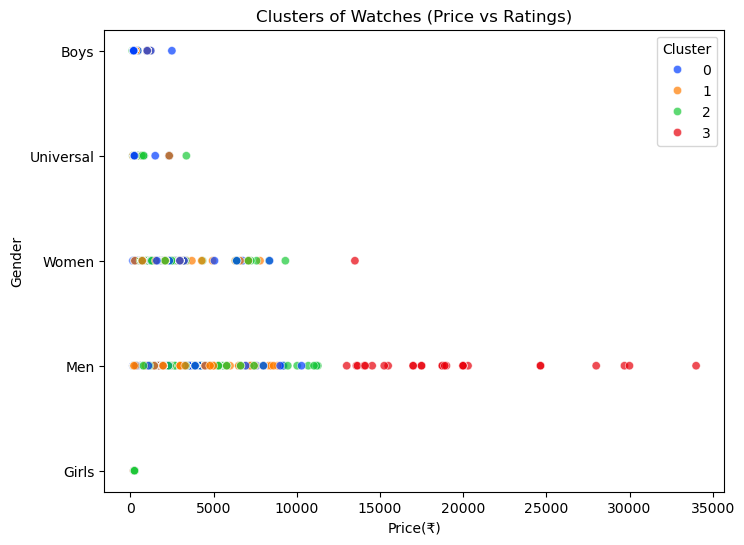

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = watch_data[watch_data["Gender"] != "Unknown"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=filtered_data, 
    x="Price(₹)", 
    y="Gender", 
    hue="Cluster", 
    palette="bright", 
    alpha=0.7
)
plt.title("Clusters of Watches (Price vs Ratings)")
plt.legend(title="Cluster")
plt.show()


In [14]:
watch_data.to_csv("watches_cluster.csv", index=False, encoding="utf-8-sig")
